<a href="https://colab.research.google.com/github/purshottamkumarr/Amazon_Sales_Analysis/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/Amazon Sales data.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
data.shape

(100, 14)

In [ ]:
data.size

1400

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
data = data.astype({"Order Date":"datetime64[ns]","Ship Date":"datetime64[ns]"})
data.dtypes

,0
Region,object
Country,object
Item Type,object
Sales Channel,object
Order Priority,object
Order Date,datetime64[ns]
Order ID,int64
Ship Date,datetime64[ns]
Units Sold,int64
Unit Price,float64


In [ ]:
data.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


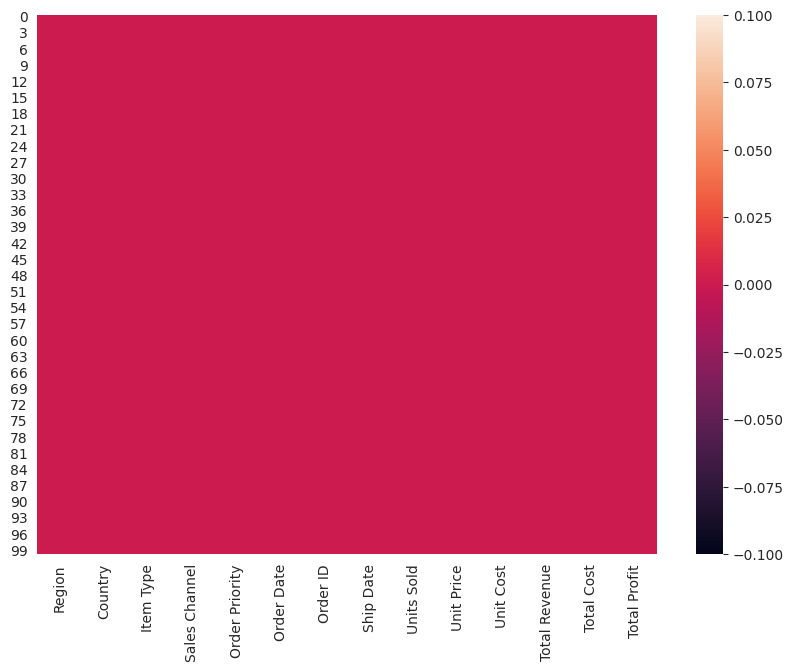

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull());

In [ ]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


Higest Toal Revenue

In [ ]:
Highest_Total_revenue = data.groupby(data["Region"])["Total Revenue"].sum()
Highest_Total_revenue.idxmax()

'Sub-Saharan Africa'

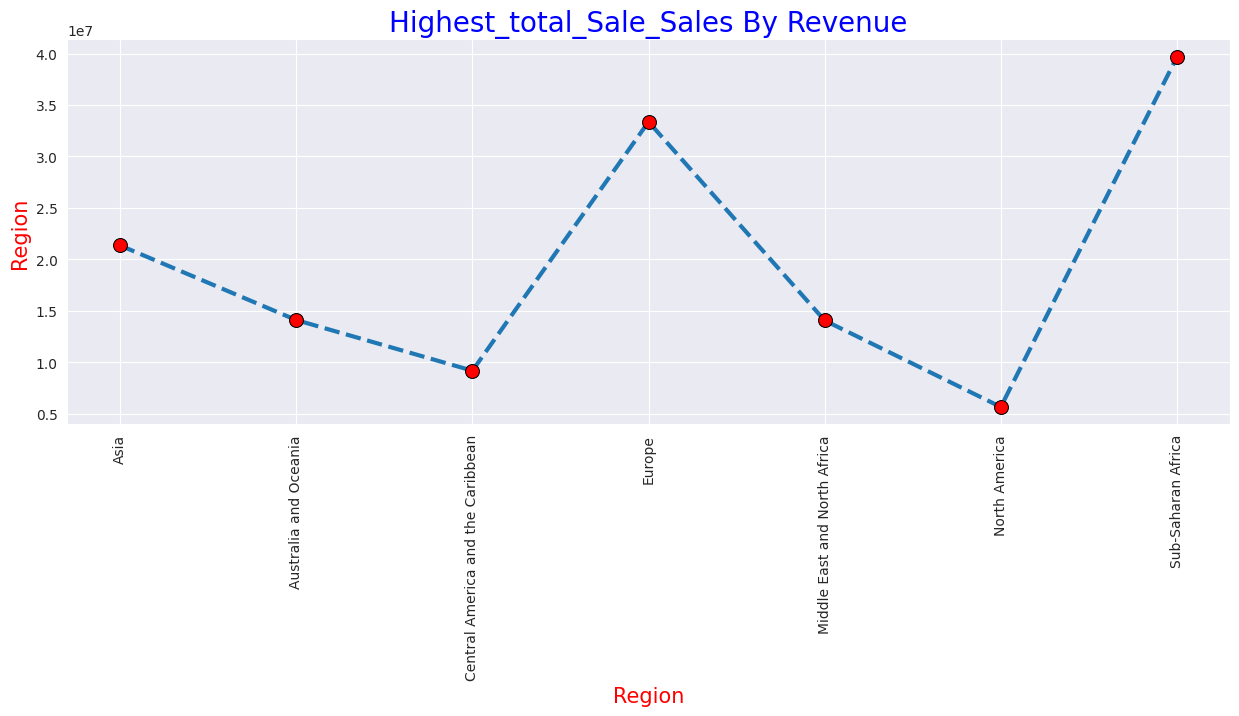

In [ ]:
group_data = data.groupby(data["Region"])["Total Revenue"].sum()
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.lineplot(data = group_data,linestyle = "--",linewidth=3, marker="o",markersize = 10,markerfacecolor="red",markeredgecolor="black")
plt.title("Highest_total_Sale_Sales By Revenue",fontsize = 20,color = "blue")
plt.xticks(rotation =90)
plt.xlabel("Region",fontsize = 15,color = "red")
plt.ylabel("Region",fontsize=15,color ="red")
plt.show()

2 : What is the average Units Pricd and unit Cost for Each items>

In [ ]:
Avg_unit_Price = data.groupby(data["Item Type"])["Unit Price"].mean()

Avg__unit_cost = data.groupby(data["Item Type"])["Unit Cost"].mean()

Average_price_cost = pd.DataFrame({"Avg_unit_Price":Avg_unit_Price,"Avg__unit_cost":Avg__unit_cost})

Average_price_cost

,Avg_unit_Price,Avg__unit_cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


Which Country has Highest Total Profit.

In [ ]:
Total_profit_by_Company = data.groupby(data["Country"])["Total Profit"].sum()

Total_profit_country = Total_profit_by_Company.idxmax()

Total_profit_country



'Djibouti'

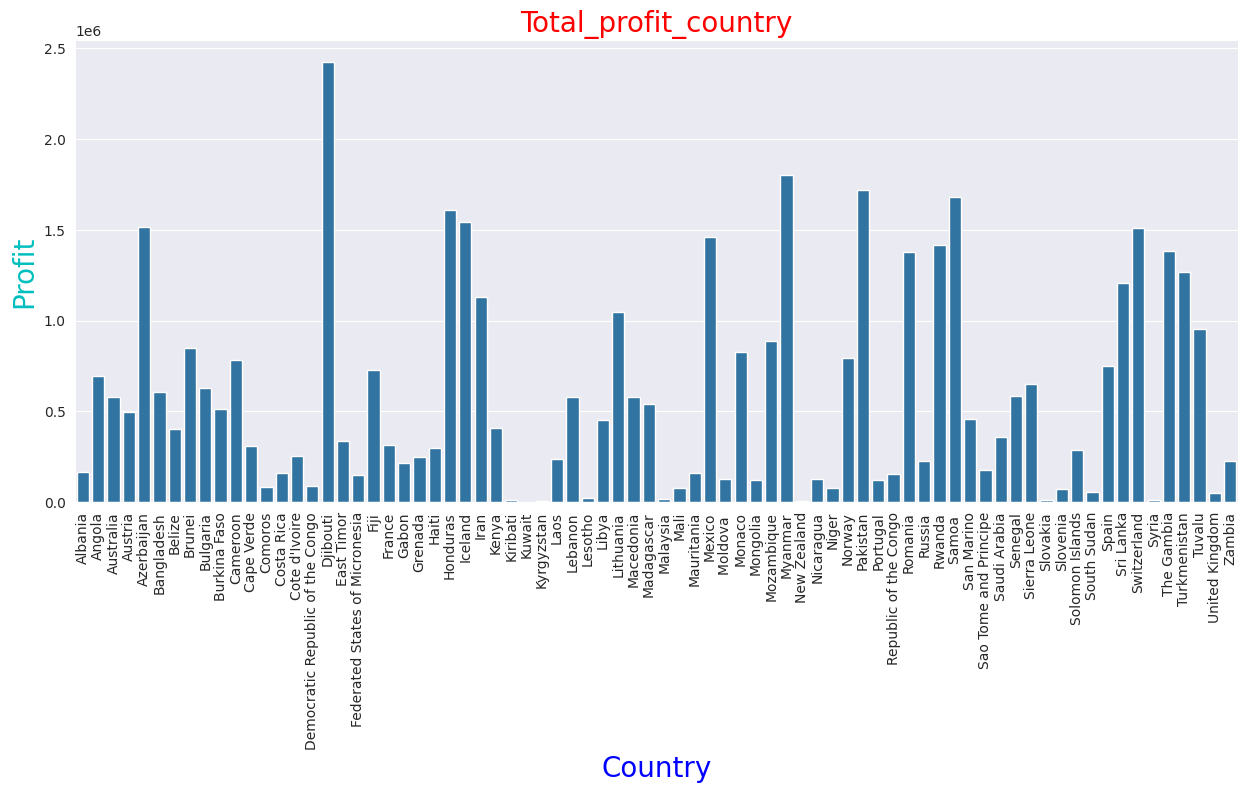

In [ ]:
Total_profits_by_Country = data.groupby(data["Country"])["Total Profit"].sum()
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
sns.barplot(x =Total_profits_by_Country.index,y=Total_profits_by_Country)
plt.xticks(rotation=90)
plt.title("Total_profit_country",color = "red",fontsize =20)
plt.xlabel("Country",color ="blue",fontsize = 20)
plt.ylabel("Profit",color = "c",fontsize = 20)
plt.show()

How Does the Saels Channel Order Are Prioprity

In [ ]:
Sales_Channel_distribution = data.groupby(data["Sales Channel"])["Order Priority"].value_counts()
Sales_Channel_distribution

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

In [ ]:
Sales_Channel_distribution = data.groupby(["Sales Channel","Order Priority"])["Order Priority"].count()
Sales_Channel_distribution = Sales_Channel_distribution.reset_index(name = "Count")


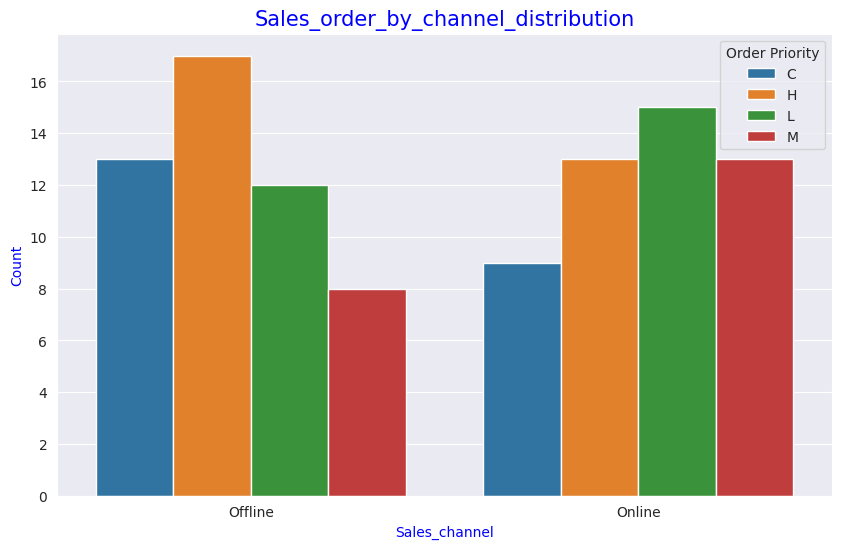

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.barplot(x="Sales Channel",y = "Count",hue="Order Priority",data=Sales_Channel_distribution)
plt.title("Sales_order_by_channel_distribution",fontsize=15,color="blue")
plt.xlabel("Sales_channel",fontsize=10,color="blue")
plt.ylabel("Count",fontsize=10,color="blue")
plt.show()

In [ ]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


What is the average order Processing Time(duration between Order and Ship date )For each saels

In [ ]:
data["Processing_time"] = data["Ship Date"]-data["Order Date"]
average_processing_time = data.groupby(data["Sales Channel"])["Processing_time"].mean()
average_processing_time


,Processing_time
Sales Channel,
Offline,23 days 04:48:00
Online,23 days 12:28:48


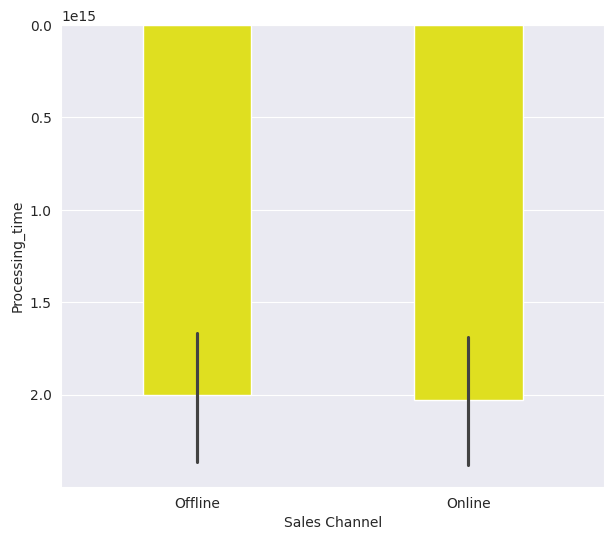

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(x="Sales Channel",y = "Processing_time",data=data,width =0.4,color="yellow")
plt.show()

which items types have the highest and lowest total_sales ?

In [ ]:
Group_item_type = data.groupby(data["Item Type"])["Total Revenue"].sum()
Group_item_type

,Total Revenue
Item Type,
Baby Food,10350327.60
Beverages,2690794.60
Cereal,5322898.90
Clothes,7787292.80
Cosmetics,36601509.60
Fruits,466481.34
Household,29889712.29
Meat,4503675.75
Office Supplies,30585380.07


In [ ]:
Higest_total_revenue = Group_item_type.idxmax()
Higest_total_revenue

'Cosmetics'

In [ ]:
lowest_total_revenue = Group_item_type.idxmin()
lowest_total_revenue

'Fruits'

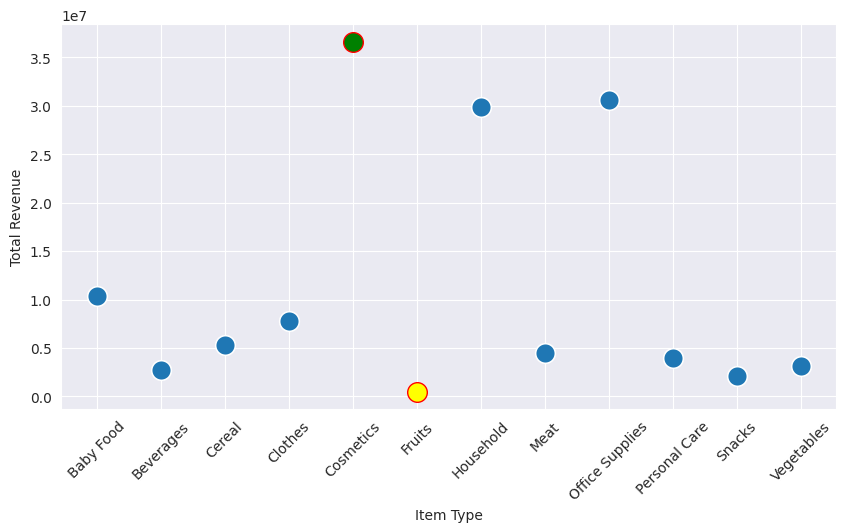

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=Group_item_type.index,y=Group_item_type,s=200)
max_index = Group_item_type.idxmax()
plt.scatter(x=max_index,y=Group_item_type[max_index],s=200,color="Green",edgecolor="red")
min_index = Group_item_type.idxmin()
plt.scatter(x=min_index,y=Group_item_type[min_index],s=200,color="yellow",edgecolor="red")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

How does order pripority vary across different regions ?

In [ ]:
Different_region_by_order_pripority = data.groupby(data["Region"])["Order Priority"].value_counts()
Different_region_by_order_pripority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   C                  2
                                   M                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  C                  2
                                   H                  2
                                   L                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       L                  4
                                   M                  4
                                   H                  2
North America                      C                  1
                                   L                  1
                                   M                  1
Sub-Saharan Africa                 H                 11
                                   L                  9
                                   C                  8
                                   M                  8
Name: count, dtype: int64

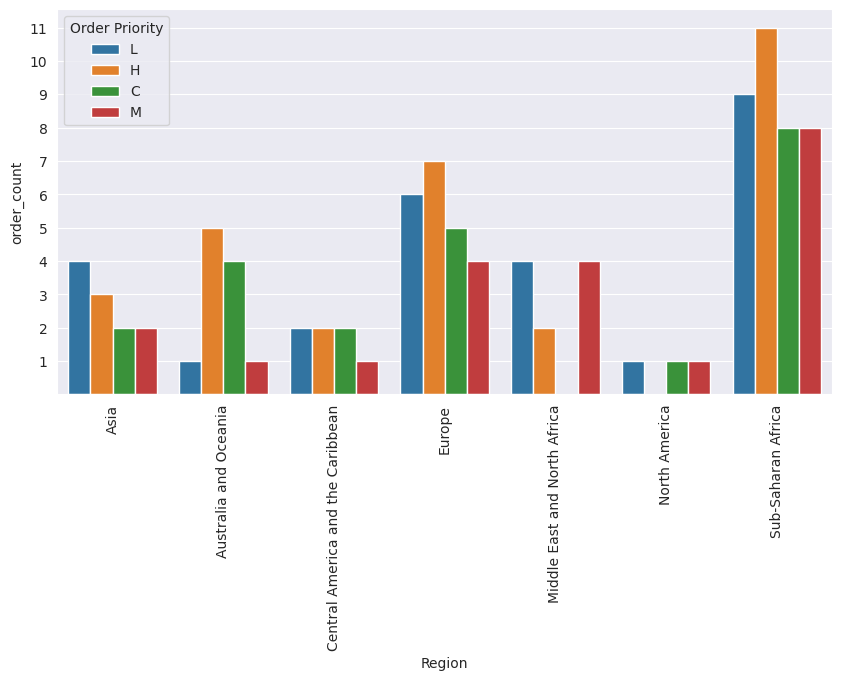

In [ ]:
Different_region_by_order_priporty = data.groupby(data["Region"])["Order Priority"].value_counts().reset_index(name = "order_count")
plt.figure(figsize=(10,5))
sns.barplot(x="Region",y="order_count",data=Different_region_by_order_priporty,hue="Order Priority")
plt.xticks(rotation=90)
plt.yticks(np.arange(1,12,1))
plt.show()

In [ ]:
data.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing_time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.0,1582243.50,951410.50,30 days
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.8,328376.44,248406.36,24 days


What is the Correlation Between Unit Price and Total Profit ?

In [ ]:
Correlation_Unit_price_total_profit = data["Unit Price"].corr(data["Total Profit"])
print("correlation b/w Unit price and Total Profit",Correlation_Unit_price_total_profit)

correlation b/w Unit price and Total Profit 0.5573652488121267


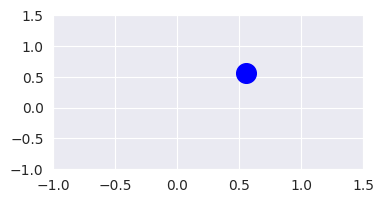

In [ ]:
plt.figure(figsize=(4,2))
plt.scatter(x=Correlation_Unit_price_total_profit,y=Correlation_Unit_price_total_profit,color="blue",s=200)
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.show()

Are there it is any seasonal trend or pattern in India ?

In [ ]:
month_names = {1:"jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"jun",7:"jul",8:"Aug",9:"Sep",10:"oct",11:"Nov",12:"Dec"}

In [ ]:
Monthly_sales = data.groupby(data["Order Date"].dt.month)["Total Revenue"].sum()
Monthly_sales.index = Monthly_sales.index.map(month_names)
Monthly_sales

,Total Revenue
Order Date,
jan,10482467.12
Feb,24740517.77
Mar,2274823.87
Apr,16187186.33
May,13215739.99
jun,5230325.77
jul,15669518.50
Aug,1128164.91
Sep,5314762.56


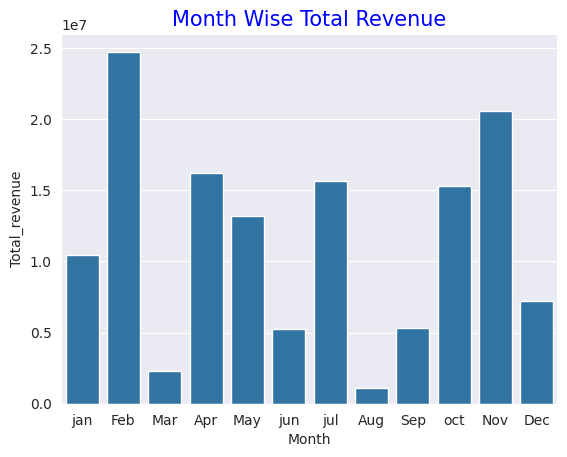

In [ ]:
sns.barplot(x=Monthly_sales.index,y=Monthly_sales)
plt.title("Month Wise Total Revenue",fontsize = 15,color ="blue")
plt.xlabel("Month")
plt.ylabel("Total_revenue")
plt.show()

How Does the no of Units Sold vary across different countries ?

In [ ]:
Different_countries_units_solds = data.groupby(data["Country"])["Units Sold"].sum().reset_index(name="Unit sold")
pd.set_option("display.max_row",None)
Different_countries_units_solds

,Country,Unit sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing_time
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,30 days
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,24 days
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,6 days
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,15 days
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,5 days


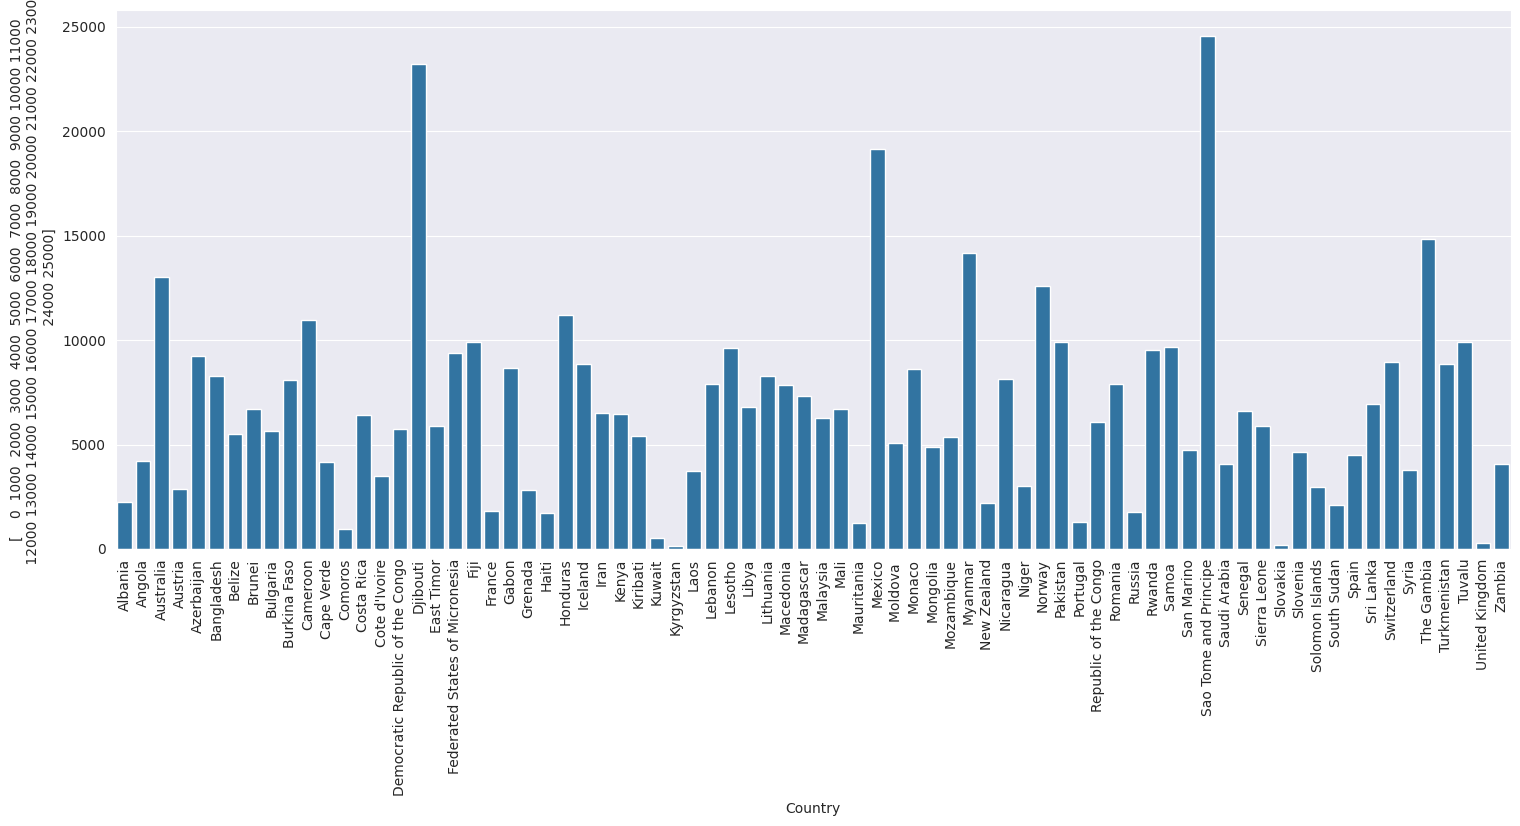

In [ ]:
plt.figure(figsize=(18,7))
sns.barplot(data=Different_countries_units_solds,x="Country",y="Unit sold")
plt.xticks(rotation=90)
plt.ylabel(np.arange(0,26000,1000))
plt.show()

What is the distribution of unit Prices of each item type ?

In [ ]:
Unit_price_and_item_type_distribution = data.groupby(data["Item Type"])["Unit Price"].sum().reset_index(name="Unit_prices")
Unit_price_and_item_type_distribution

,Item Type,Unit_prices
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


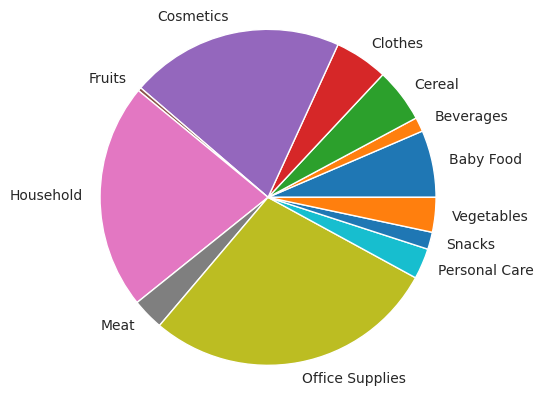

In [ ]:
plt.pie(x=Unit_price_and_item_type_distribution["Unit_prices"],labels=Unit_price_and_item_type_distribution["Item Type"])
plt.axis("equal")
plt.show()

Which sales channel has highest average Unit price?

In [ ]:
Higest_sales_channel = data.groupby(data["Sales Channel"])["Unit Price"].sum().reset_index(name="New")
Higest_sales_channel

,Sales Channel,New
0,Offline,15536.03
1,Online,12140.10


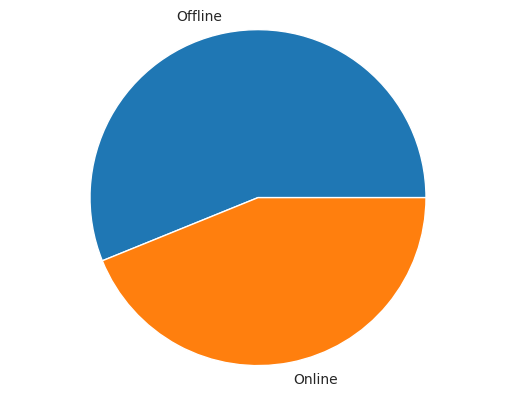

In [ ]:
plt.pie(x=Higest_sales_channel["New"],labels=Higest_sales_channel["Sales Channel"])
plt.axis("equal")
plt.show()

How does the total profit vary across different item Types?

In [ ]:
Total_profit_and_diff_item = data.groupby(data["Total Profit"])["Item Type"].sum().reset_index(name ='Profit')
Total_profit_and_diff_item

,Total Profit,Profit
0,1258.02,Fruits
1,1621.93,Fruits
2,5270.67,Fruits
3,6841.38,Personal Care
4,7828.12,Vegetables
5,9119.44,Fruits
6,10795.23,Vegetables
7,13009.18,Fruits
8,14031.02,Fruits
9,15103.47,Fruits


What is the Average order processing time for each country

In [ ]:
average_order_processing = data.groupby(data["Country"])["Processing_time"].mean()
average_order_processing

,Processing_time
Country,
Albania,44 days 00:00:00
Angola,4 days 00:00:00
Australia,18 days 16:00:00
Austria,7 days 00:00:00
Azerbaijan,30 days 00:00:00
Bangladesh,47 days 00:00:00
Belize,44 days 00:00:00
Brunei,37 days 00:00:00
Bulgaria,26 days 12:00:00


which region has highest average total_revenue_per_order

In [ ]:
data["average_total_revenue"] = data["Total Revenue"]/data["Units Sold"]
Highest_average_total_revenue = data.groupby(data["Region"])["average_total_revenue"].mean()
Highest_average_total_revenue

,average_total_revenue
Region,
Asia,335.809091
Australia and Oceania,222.672727
Central America and the Caribbean,243.172857
Europe,328.979545
Middle East and North Africa,241.506000
North America,277.243333
Sub-Saharan Africa,259.618889


In [ ]:
Highest_average_total_revenue.sort_values(ascending=True)
Highest_average_total_revenue.head(1)

,average_total_revenue
Region,
Asia,335.809091


Is there relationship between number of units sold and Total Profit

In [ ]:
Correlation_Unit_price_total_profit = data["Units Sold"].corr(data["Total Profit"])
print("The Correlation between Price are :",Correlation_Unit_price_total_profit)

The Correlation between Price are : 0.5645504620845976


How does the Order prioprity vary based on the Items type?

In [ ]:
order_Prioprtity_based_on_Profit = data.groupby(data["Order Priority"])["Item Type"].value_counts().reset_index(name="Order_prioprity")
order_Prioprtity_based_on_Profit

,Order Priority,Item Type,Order_prioprity
0,C,Beverages,7
1,C,Clothes,4
2,C,Office Supplies,2
3,C,Personal Care,2
4,C,Vegetables,2
5,C,Baby Food,1
6,C,Cereal,1
7,C,Cosmetics,1
8,C,Fruits,1
9,C,Household,1
